In [1]:
%load_ext autotime
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_multilabel_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb


%matplotlib inline
matplotlib.style.use('ggplot')

pd.options.display.max_columns = 120
pd.options.display.max_rows = 1200

# Show frequency table and plot values
def showDist(variable):
    print("Frquency counts\n ",variable.iloc[:,0].value_counts() / len(variable))
    plt.hist(variable.values)
    plt.show()
    
print("Loaded all.")

Loaded all.


In [2]:
try:
    df.head()
except NameError: 
    location = Path("Files/AcxionMergedData.csv")
    df = pd.read_csv(location, dtype=object, index_col='ky_ba')

    
df_raw = df.copy()
    
print("Loaded file, total size of DF is: ",df.shape)

df.info()

Loaded file, total size of DF is:  (1264435, 104)
<class 'pandas.core.frame.DataFrame'>
Index: 1264435 entries, 1371466055.0 to 9188219266.0
Columns: 104 entries, Unnamed: 0 to products_HeatPump
dtypes: object(104)
memory usage: 1012.9+ MB
time: 20 s


#### Clean and Prepare

In [3]:
cols = ['cd_co',  'p_age_2nd', 'p_Env_Issues', 'p_hm_purch', 'p_Internet_user', 'pp_age', 'pp_edu',
        'pp_hh_size', 'pp_income', 'pp_res_length', 'p_technology', 'p_green_living', 'Hm_Bedroom_Count',
        'Hm_Exterior', 'Hm_Heat_Source', 'Hm_Lot_Sqft_Actual', 'Hm_Room_Count', 'Geo_Latitude',
        'Geo_Longitude', 'FIPS_county_cd', 'match_num_sources', 'Matchlev_geo_latlong', 'matchlev_pp_age',
        'matchlev_pp_child', 'matchlev_pp_child_range', 'matchlev_pp_edu', 'matchlev_pp_hh_size',
        'matchlev_pp_income', 'matchlev_pp_marital', 'matchlev_pp_own_rent', 'matchlev_pp_res_length',
        'SOHO_indicator', 'Afford_Lvl', 'Comfort_Consumption', 'Green_Affinity', 'Info_Action_Cap',
        'Invest_Cap', 'Axm_Seg_ECDS', 'Tech_Prop_Scr', 'ZIP_4', 'KY_PREM_NO', 'KY_CUST_NO', 'TX_BUS_PHN_NO',
        'TX_ALT_PHN_NO', 'Zip', 'fips', 'POPPCT_URBAN', 'products_FlatBill', 'products_Paperless',
        'products_BudgetBill', 'products_EFT', 'products_WaterHeater', 'products_HeatPump']

df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

time: 1min 32s


In [4]:
# Custom work needed
df['p_Env_Issues'] = df['p_Env_Issues'].fillna(value=0)
#plt.hist(df['p_Internet_user'].values)
#df[pd.to_numeric(df['num'], errors='coerce').isnull()]

time: 19.1 ms




Filtering around columns with more than 20% missing data
Before shape:  (1264435, 67)
After shape:   (1264435, 67) 


Column 0(p_gender): is object. Converting. . .
Column 1(p_2nd_ind_gender): is object. Converting. . .
Column 2(p_age_2nd): is float64
Mean is:  57.44339289783998



C:\ProgramData\Anaconda3\envs\spaces\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\envs\spaces\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


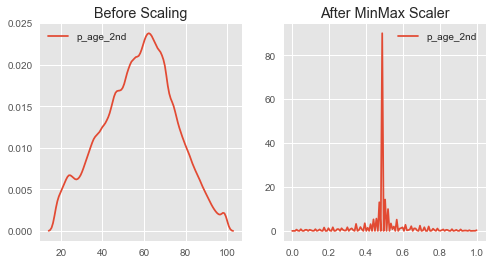

Column 3(p_child_AgeRange): is object. Converting. . .
Column 4(p_credit_card): is object. Converting. . .
Column 5(p_bank_card): is object. Converting. . .
Column 6(p_gas_card): is object. Converting. . .
Column 7(p_trav_card): is object. Converting. . .
Column 8(p_unkwn_card): is object. Converting. . .
Column 9(p_prem_card): is object. Converting. . .
Column 10(p_upsc_card): is object. Converting. . .
Column 11(p_dwelling): is object. Converting. . .
Column 12(p_Env_Issues): is float64
Mean is:  0.08961235650705651



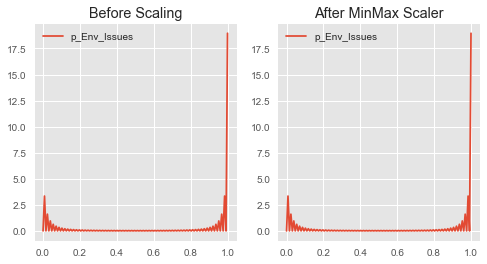

Column 13(p_hm_purch): is float64
Mean is:  200288.72465102948



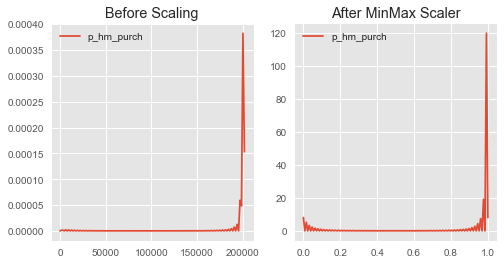

Column 14(p_homeval): is object. Converting. . .
Column 15(p_homevalDS): is object. Converting. . .
Column 16(p_Internet_user): is float64
Mean is:  1.0
Column p_Internet_user has no range!, all values are 1.0.



C:\ProgramData\Anaconda3\envs\spaces\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\ProgramData\Anaconda3\envs\spaces\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\envs\spaces\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


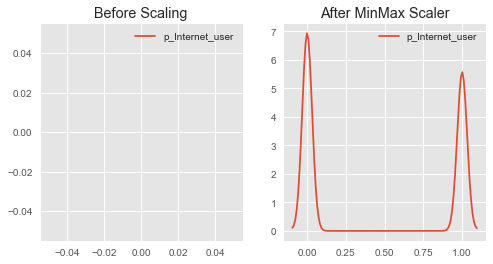

Column 17(p_mail_order): is object. Converting. . .
Column 18(p_mail_resp): is object. Converting. . .
Column 19(p_ocu_1st): is object. Converting. . .
Column 20(p_ocu_1stDS): is object. Converting. . .
Column 21(p_ocu_2nd): is object. Converting. . .
Column 22(pp_age): is float64
Mean is:  52.47968801653873



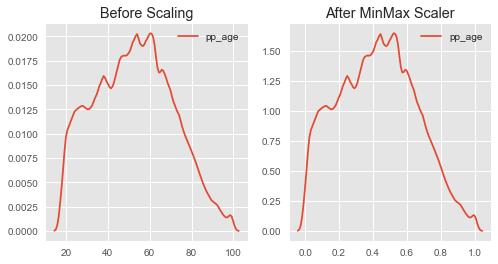

Column 23(pp_ageDS): is object. Converting. . .
Column 24(pp_child): is object. Converting. . .
Column 25(pp_child_range): is object. Converting. . .
Column 26(pp_edu): is float64
Mean is:  1.404950546730295



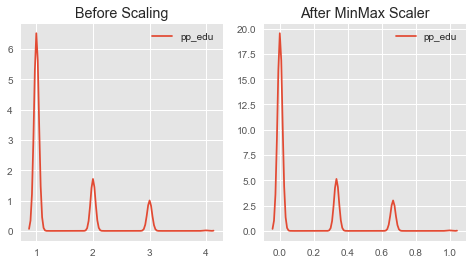

Column 27(pp_eduDS): is object. Converting. . .
Column 28(pp_hh_size): is float64
Mean is:  2.7059226874486924



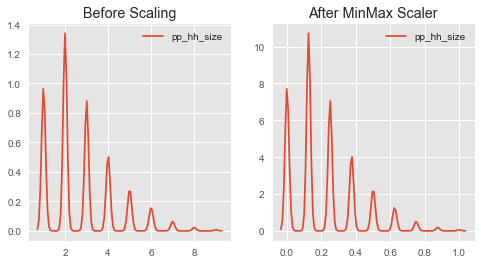

Column 29(pp_income): is float64
Mean is:  4.7358129301358876



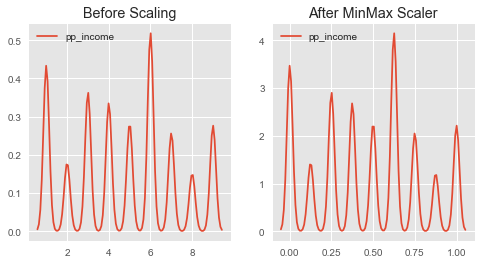

Column 30(pp_incomeDS): is object. Converting. . .
Column 31(pp_marital): is object. Converting. . .
Column 32(pp_maritalDS): is object. Converting. . .
Column 33(pp_own_rent): is object. Converting. . .
Column 34(pp_own_rentDS): is object. Converting. . .
Column 35(pp_res_length): is float64
Mean is:  8.062739931004266



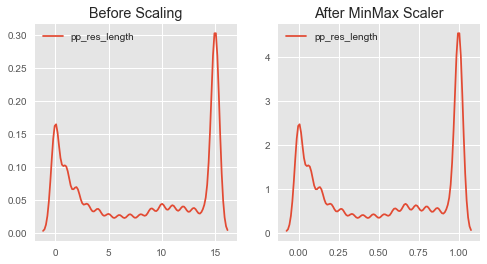

Column 36(pp_res_lengthDS): is object. Converting. . .
Column 37(p_race_Code): is object. Converting. . .
Column 38(p_race_code_DS): is object. Converting. . .
Column 39(p_language): is object. Converting. . .
Column 40(p_language_DS): is object. Converting. . .
Column 41(p_technology): is float64
Mean is:  9.750774394319432



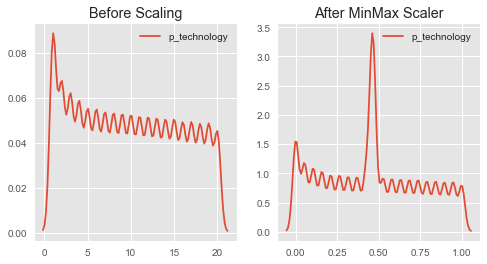

Column 42(p_green_living): is float64
Mean is:  1.0
Column p_green_living has no range!, all values are 1.0.



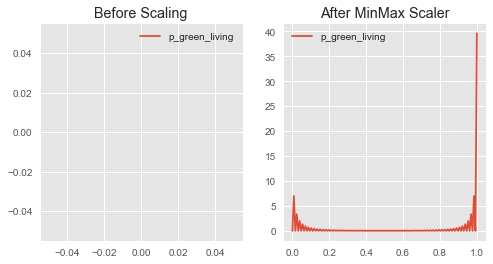

Column 43(Hm_Bedroom_Count): is float64
Mean is:  3.242208154454389



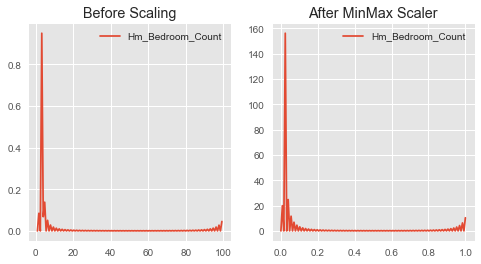

Column 44(Hm_Exterior): is float64
Mean is:  52.130453286171566



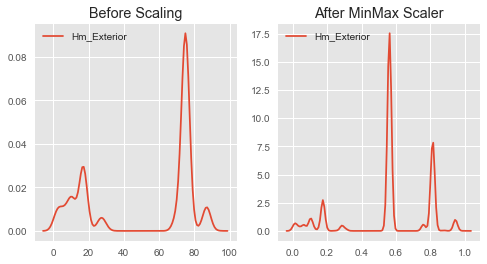

Column 45(Hm_ExteriorDS): is object. Converting. . .
Column 46(Hm_Heat_Source): is float64
Mean is:  2.431658288063361



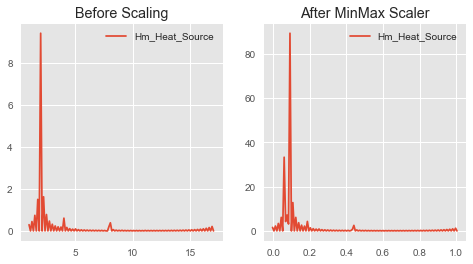

Column 47(Hm_Heat_SourceDS): is object. Converting. . .
Column 48(Hm_Lot_Sqft_Actual): is float64
Mean is:  198241.61254943896



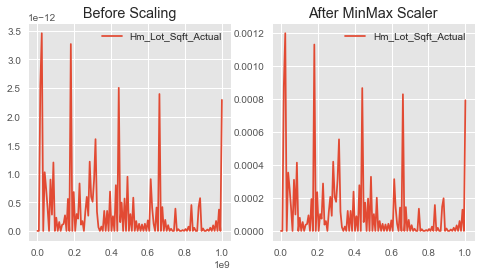

Column 49(Hm_Pool): is object. Converting. . .
Column 50(Hm_Room_Count): is float64
Mean is:  7.027845137724135



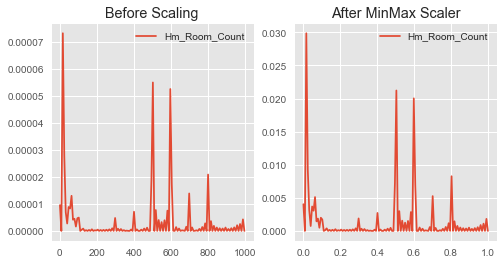

Column 51(sqft_actual): is object. Converting. . .
Column 52(sqft_range): is object. Converting. . .
Column 53(sqft_rangeDS): is object. Converting. . .
Column 54(Hm_Yr_Built_Actual): is object. Converting. . .
Column 55(Geo_Latitude): is float64
Mean is:  32.77519335068023



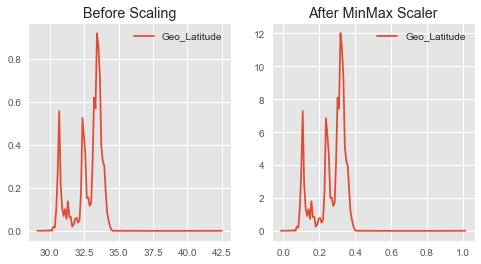

Column 56(Geo_Longitude): is float64
Mean is:  -86.79286426840277



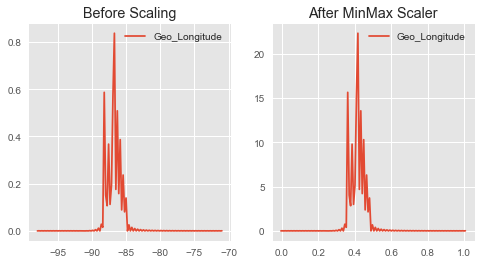

Column 57(FIPS_county_cd): is float64
Mean is:  81.87663886919432



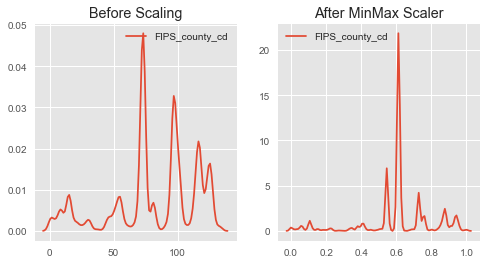

Column 58(match_indc_infobase): is object. Converting. . .
Column 59(match_indc_overall): is object. Converting. . .
Column 60(match_num_sources): is float64
Mean is:  32.45749601482195



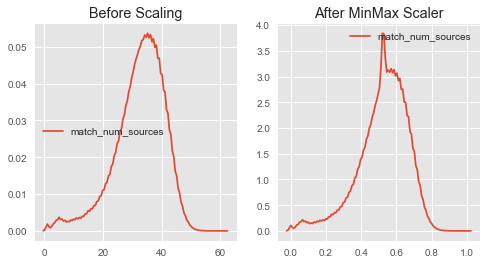

Column 61(Matchlev_geo_latlong): is float64
Mean is:  2.1042069682211535



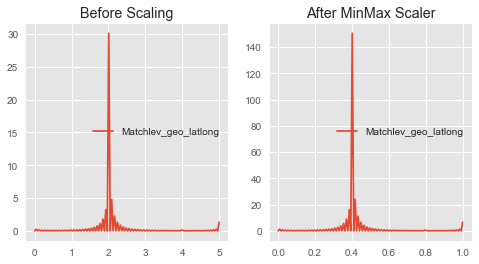

Column 62(matchlev_pp_age): is float64
Mean is:  3.176347194572412



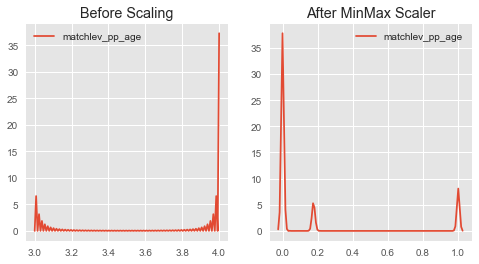

Column 63(matchlev_pp_child): is float64
Mean is:  3.370352735714132



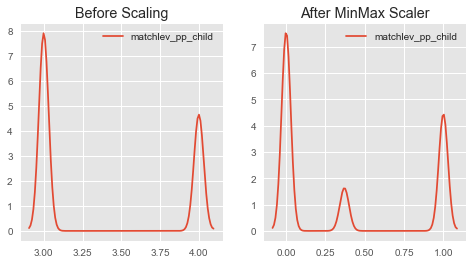

Column 64(matchlev_pp_child_range): is float64
Mean is:  3.4684423911668762



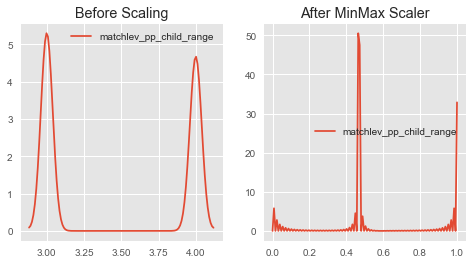

Column 65(matchlev_pp_edu): is float64
Mean is:  3.437249804155497



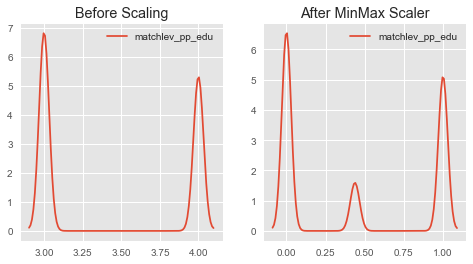

Column 66(matchlev_pp_hh_size): is float64
Mean is:  3.0274272141209275



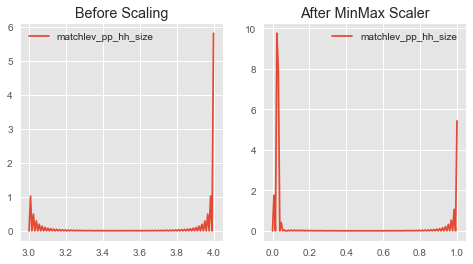

Column 67(matchlev_pp_income): is float64
Mean is:  3.1196385321364657



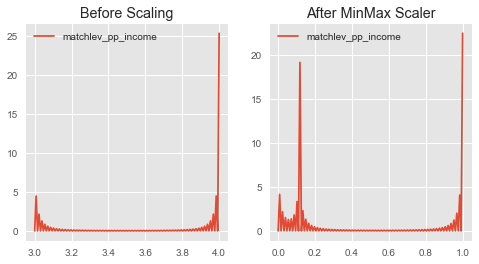

Column 68(matchlev_pp_marital): is float64
Mean is:  3.1477035884462525



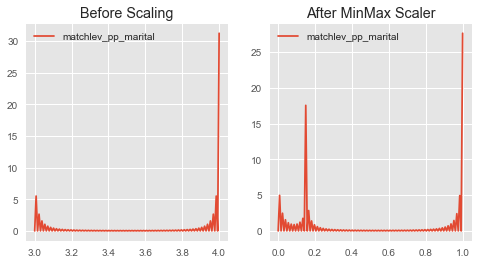

Column 69(matchlev_pp_own_rent): is float64
Mean is:  3.216018283611588



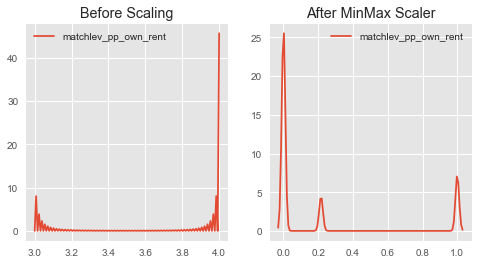

Column 70(matchlev_pp_res_length): is float64
Mean is:  3.105241266053859



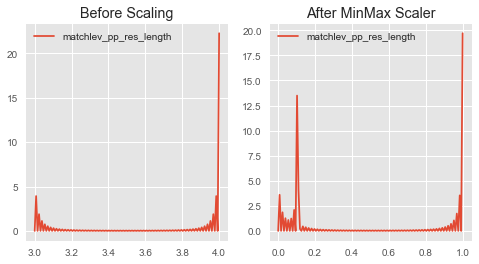

Column 71(dma_nomail): is object. Converting. . .
Column 72(SOHO_indicator): is float64
Mean is:  1.0
Column SOHO_indicator has no range!, all values are 1.0.



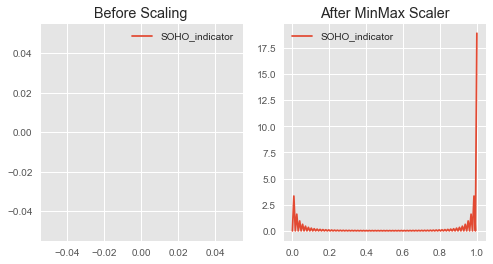

Column 73(Afford_Lvl): is float64
Mean is:  3.210451224508196



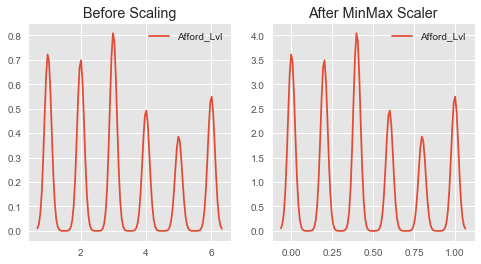

Column 74(Comfort_Consumption): is float64
Mean is:  3.342780834940123



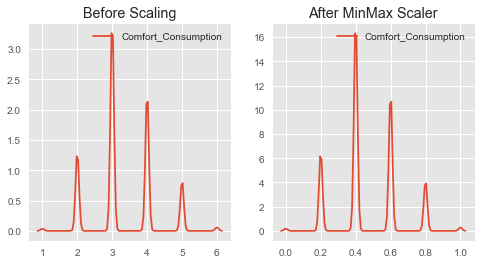

Column 75(Green_Affinity): is float64
Mean is:  3.7465719622975167



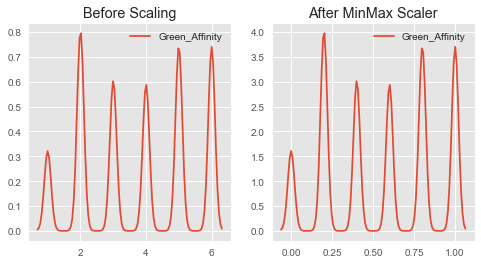

Column 76(Info_Action_Cap): is float64
Mean is:  3.0285220329224485



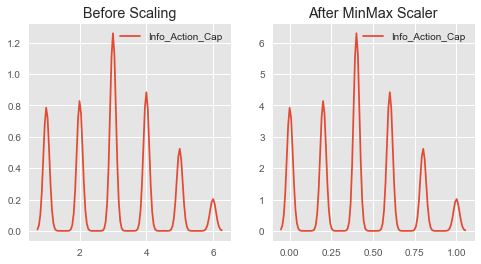

Column 77(Invest_Cap): is float64
Mean is:  2.771843508437821



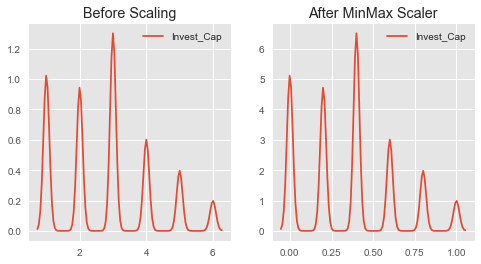

Column 78(Axm_Seg_ECDS): is float64
Mean is:  7.678692149639441



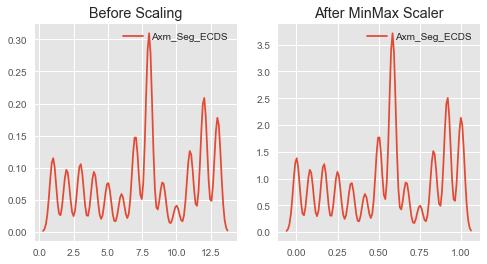

Column 79(acxiom_seg): is object. Converting. . .
Column 80(Tech_Prop_Scr): is float64
Mean is:  3.459040703054192



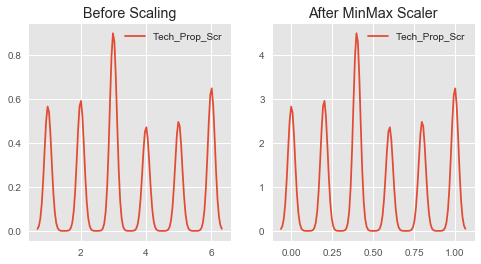

Column 81(NM_COMPRESSED): is object. Converting. . .
Column 82(Address): is object. Converting. . .
Column 83(NOCONTACT): is object. Converting. . .
Column 84(tx_nocontact): is object. Converting. . .
Column 85(city): is object. Converting. . .
Column 86(POPPCT_URBAN): is float64
Mean is:  64.44780214953433



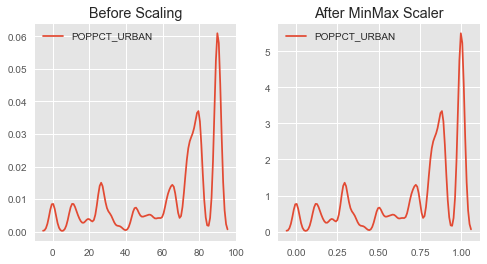

Column 87(Segment): is object. Converting. . .
Column 88(division): is object. Converting. . .


Filtering around columns with more than 20% missing data
Before shape:  (1264435, 95)
After shape:   (1264435, 95) 


Uh oh found nulls!


File Files/preprocessedNums.csv already exists, not writing.

time: 1min 3s


In [5]:
# Set temp to play with and set index
dfTemp = df.copy()
dropCols = ['Unnamed: 0','cd_co','KY_PREM_NO','KY_CUST_NO','Zip','fips','ZIP_4','TX_ALT_PHN_NO','TX_BUS_PHN_NO']
dfTemp = dfTemp.drop(dropCols, axis=1, errors='ignore')
#dfTemp = dfTemp.sample(frac=1, replace=True) # moved to later in pipeline


# Remove any columns with more than 20% missing values
print("\n\nFiltering around columns with more than 20% missing data")
df20Missing = dfTemp[dfTemp.columns[dfTemp.isnull().mean() < 0.2]]
print("Before shape: ",df20Missing.shape)
print("After shape:  ",df20Missing.shape,'\n\n')


# MinMax scaler for (0,1) range
for index,column in enumerate(dfTemp.iloc[:,:-6]):
    
    #### Encode categorical
    if dfTemp[column].dtype == 'object':
        print("Column {0}({1}): is {2}. Converting. . .".
              format(index, dfTemp.columns[index], dfTemp[column].dtype))
        dfTemp[column] = pd.Categorical(dfTemp[column]).codes # Replace with an integer
        
    if dfTemp[column].dtype == np.float64 or dfTemp[column].dtype == np.int64:
        numColumn = True
    else:
        colType = dfTemp[column].dtype
        numColumn = False
        
    
    # Feature Scaling if numeric      
    if numColumn == True:
        print("Column {0}({1}): is {2}".format(index, dfTemp.columns[index], dfTemp[column].dtype))

        column_old = dfTemp[column].copy()
            
        # Impute mean values first
        X = dfTemp[column].mean(skipna=True)
        print("Mean is: ",X)
        
        # Check if min/max are equal, then impute a 0
        if np.max(dfTemp[column]) == np.min(dfTemp[column]):
            print("Column {0} has no range!, all values are {1}.".format(column,np.min(dfTemp[column])))
            dfTemp[column] = dfTemp[column].fillna(value=0)
        else:
            dfTemp[column] = dfTemp[column].fillna(value=X)
        
        
        # Scale in range 0-1
        scaler = MinMaxScaler()
        X = scaler.fit_transform(dfTemp[column].values.reshape(-1, 1))
        dfTemp[column] = X
        #print("Quantiles before: \n", columnn_old.quantile([.0, .25, .5, .75, 1.0]))
        #print("Quantiles after: \n", dfTemp[column].quantile([.0, .25, .5, .75, 1.0]))
        print()
        
        # Plot the before/after scaling
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4))
        ax1.set_title('Before Scaling')
        sns.kdeplot(column_old, ax=ax1)
        ax2.set_title('After MinMax Scaler')
        sns.kdeplot(dfTemp[column], ax=ax2)
        plt.show()
        
        

# Remove any columns with more than 20% missing values
print("\n\nFiltering around columns with more than 20% missing data")
df20Missing = dfTemp[dfTemp.columns[dfTemp.isnull().mean() < 0.2]]
print("Before shape: ",df20Missing.shape)
print("After shape:  ",df20Missing.shape,'\n\n')

# Check for missings to assure none
if df20Missing.isnull().values.any():
    print("Uh oh found nulls!\n\n")
else:
    print("No nulls found!\n\n")
    
# Still has character NA we need to solve.

# Save the current DF since this takes forever. . .
import os
# if file does not exist write header 
fileName = 'Files/preprocessedNums.csv'
if not os.path.isfile(fileName):
    df20Missing.to_csv(fileName)
else:
    print("File {0} already exists, not writing.\n".format(fileName))

In [6]:
# Save the current DF since this takes forever. . .
import os
# if file does not exist write header 
filePath = 'Files/preprocessedFull.csv'

def writeFile(df, filePath):
    if not os.path.isfile(filePath):
        df.csv(filePath)
        print("Printed file: ",filePath)
    else:
        printed = False
        for i in range(0,4):
            print("Entering loop {0}".format(i))
            if printed == False:
                newPath = filePath + "_" + str(i)
                if not os.path.isfile(newPath):
                    df.to_csv(newPath)
                    print("File: {0} already exists, appending _{1} to end.".format(filePath,i))
                    print("Printed file: ",newPath)
                    printed = True
                    break

#writeFile(df20Missing, filePath)

time: 20.1 ms


### All 6 targets

#### Numeric Only

In [7]:

#df20Missing = pd.read_csv("Files/preprocessedFull.csv_0")

time: 16 ms


In [8]:
#### Numeric only

# Drop strings
dfNumeric = df20Missing.select_dtypes(include=['float64','int64'])

# Knock out remaining features that won't work (zip, ID numbers)
dropCols = set(['KY_PREM_NO','KY_CUST_NO','Zip','fips','ZIP_4'])
dfNumeric = dfNumeric.drop(dropCols, errors='ignore')
dfNumeric = dfNumeric.dropna(axis=0, how='any')

# Check for missings to assure none
if dfNumeric.isnull().values.any():
    print("Uh oh found nulls in Numeric!")
else:
    print("No nulls found in Numeric!\n\n")
    
    

#### Encode categorical
dfNumEncoded = df20Missing.copy()
for feature in dfNumEncoded.columns: # Loop through all columns in the dataframe
    if dfNumEncoded[feature].dtype == 'object': # Only apply for columns with strings
        # Replace strings with an integer    
        dfNumEncoded[feature] = pd.Categorical(dfNumEncoded[feature]).codes  
        
        
# Check for missings to assure none
if dfNumEncoded.isnull().values.any():
    print("Uh oh found nulls! in Encoded")
    rowsBefore = dfNumEncoded.shape[0]
    dfNumEncoded = dfNumEncoded.dropna(axis=0, how='any')
    print("Removed rows with NA, total rows is now: {0}, {1} less than before".
         format(dfNumEncoded.shape[0],(rowsBefore - dfNumEncoded.shape[0])))

else:
    print("No nulls found in Encoded!\n\n")
    
print("Purely numeric data has {0} columns, numeric encoded full data has {1} columns".
      format(dfNumeric.shape[1],dfNumEncoded.shape[1]))
print("Total rows is now: {0}".format(dfNumEncoded.shape[0]))


No nulls found in Numeric!


Uh oh found nulls! in Encoded
Removed rows with NA, total rows is now: 1264417, 18 less than before
Purely numeric data has 45 columns, numeric encoded full data has 95 columns
Total rows is now: 1264417
time: 5.27 s


In [9]:
for feature in dfNumEncoded.columns:        
    scaler = MinMaxScaler()
    X = scaler.fit_transform(dfNumEncoded[feature].values.reshape(-1, 1))
    dfNumEncoded[feature] = X   

C:\ProgramData\Anaconda3\envs\spaces\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\envs\spaces\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int16 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\envs\spaces\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


time: 4.01 s


In [181]:
#dfNumEncoded.to_pickle("Files/CleanedProcessedData.pickle")
test = pd.read_pickle("Files/CleanedProcessedData.pickle")

time: 1.44 s


In [ ]:
prod

# Modeling

In [160]:
#yy = dfNumEncoded[dfNumEncoded['products_WaterHeater'] == 1] # 71000
#yy = dfNumEncoded[dfNumEncoded['products_BudgetBill'] == 1]  # 
#yy = dfNumEncoded[dfNumEncoded['products_EFT'] == 1]         # 
#yy = dfNumEncoded[dfNumEncoded['products_HeatPump'] == 1]    # 
#yy = dfNumEncoded[dfNumEncoded['products_FlatBill'] == 1]    # 
#yy = dfNumEncoded[dfNumEncoded['products_Paperless'] == 1]   # 


time: 0 ns


In [161]:
dfNumEncoded.head()

,p_gender,p_2nd_ind_gender,p_age_2nd,p_child_AgeRange,p_credit_card,p_bank_card,p_gas_card,p_trav_card,p_unkwn_card,p_prem_card,p_upsc_card,p_dwelling,p_Env_Issues,p_hm_purch,p_homeval,p_homevalDS,p_Internet_user,p_mail_order,p_mail_resp,p_ocu_1st,p_ocu_1stDS,p_ocu_2nd,pp_age,pp_ageDS,pp_child,pp_child_range,pp_edu,pp_eduDS,pp_hh_size,pp_income,pp_incomeDS,pp_marital,pp_maritalDS,pp_own_rent,pp_own_rentDS,pp_res_length,pp_res_lengthDS,p_race_Code,p_race_code_DS,p_language,p_language_DS,p_technology,p_green_living,Hm_Bedroom_Count,Hm_Exterior,Hm_ExteriorDS,Hm_Heat_Source,Hm_Heat_SourceDS,Hm_Lot_Sqft_Actual,Hm_Pool,Hm_Room_Count,sqft_actual,sqft_range,sqft_rangeDS,Hm_Yr_Built_Actual,Geo_Latitude,Geo_Longitude,FIPS_county_cd,match_indc_infobase,match_indc_overall,match_num_sources,Matchlev_geo_latlong,matchlev_pp_age,matchlev_pp_child,matchlev_pp_child_range,matchlev_pp_edu,matchlev_pp_hh_size,matchlev_pp_income,matchlev_pp_marital,matchlev_pp_own_rent,matchlev_pp_res_length,dma_nomail,SOHO_indicator,Afford_Lvl,Comfort_Consumption,Green_Affinity,Info_Action_Cap,Invest_Cap,Axm_Seg_ECDS,acxiom_seg,Tech_Prop_Scr,NM_COMPRESSED,Address,NOCONTACT,tx_nocontact,city,POPPCT_URBAN,Segment,division,products_FlatBill,products_Paperless,products_BudgetBill,products_EFT,products_WaterHeater,products_HeatPump
ky_ba,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1371466055.0,9,-1,0.486955,0,6,6,4,0,3,2,2,3,0.0,0.992964,2,0,1.0,0,0,-1,-1,-1,0.172840,7,1,13,0.000000,3,0.250,0.750,6,2,2,1,1,0.933333,5,3,3,3,2,0.157895,0.0,0.022880,0.561873,-1,0.089479,-1,0.000044,-1,0.006052,-1,-1,-1,-1,0.181772,0.378416,0.181818,0,0,0.450000,0.4,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,1.0,-1,0.0,0.4,0.2,0.2,0.4,0.6,0.750000,10,0.8,100481,1221583,-1,-1,372,0.266386,8,2,0.0,0.0,0.0,0.0,0.0,0.0
1368424276.0,9,-1,0.486955,0,0,5,4,0,3,2,2,2,0.0,0.992964,7,3,0.0,-1,-1,-1,-1,-1,0.123457,5,0,0,0.000000,3,0.000,0.250,2,3,3,1,1,0.000000,15,1,0,3,2,0.052632,0.0,0.022880,0.561873,-1,0.089479,-1,0.000198,-1,0.006052,-1,-1,-1,-1,0.301930,0.383360,0.612702,0,0,0.516667,0.4,1.0,1.0,0.468442,1.0,0.0,0.0,1.0,1.0,0.0,-1,0.0,0.2,0.6,0.0,0.0,0.0,0.916667,11,1.0,71164,911155,-1,-1,257,0.826106,23,5,0.0,0.0,0.0,0.0,0.0,0.0
1354392083.0,10,-1,0.486955,0,0,5,4,0,3,2,2,2,0.0,0.992964,2,0,1.0,-1,-1,-1,-1,-1,0.074074,3,0,0,0.000000,3,0.000,0.000,8,3,3,1,1,0.000000,15,1,0,3,2,0.105263,0.0,0.022880,0.561873,-1,0.089479,-1,0.000198,-1,0.006052,-1,-1,-1,-1,0.254228,0.460598,0.612702,0,0,0.316667,0.4,1.0,1.0,0.468442,1.0,0.0,0.0,1.0,1.0,1.0,-1,0.0,0.0,0.4,0.0,0.0,0.0,0.916667,11,1.0,556701,807916,-1,-1,22,0.805035,23,4,0.0,0.0,0.0,0.0,0.0,0.0
1374479198.0,-1,-1,0.486955,0,0,5,4,0,3,2,2,2,0.0,0.992964,6,2,0.0,-1,-1,-1,-1,-1,0.197531,8,0,0,0.666667,2,0.125,0.250,2,3,3,1,1,0.000000,15,1,0,3,2,0.263158,0.0,0.022880,0.561873,-1,0.089479,-1,0.000198,-1,0.006052,-1,-1,-1,-1,0.106406,0.361095,0.612702,0,0,0.516667,0.4,1.0,1.0,0.468442,1.0,1.0,1.0,1.0,1.0,1.0,-1,0.0,0.0,0.4,0.6,0.2,0.0,0.833333,6,0.8,646434,959356,-1,-1,234,0.886991,17,2,0.0,1.0,0.0,0.0,0.0,0.0
1360260083.0,10,7,0.296296,0,3,5,4,0,5,2,2,3,0.0,0.997987,9,5,0.0,0,0,-1,-1,-1,0.370370,15,1,4,0.000000,3,0.250,0.625,5,2,2,0,0,0.266667,8,3,3,3,2,0.263158,0.0,0.020408,0.285714,11,0.062500,4,0.000198,-1,0.005020,783,4,2,185,0.337558,0.420168,0.545455,0,0,0.716667,0.4,0.0,0.0,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,-1,0.0,0.8,0.4,1.0,0.6,0.4,0.500000,9,0.8,271839,1026965,-1,-1,343,1.000000,18,0,0.0,0.0,0.0,0.0,1.0,0.0


time: 281 ms


In [162]:
dfReady.drop_duplicates(inplace=True)
dfReady.shape

(327249, 95)

time: 1.36 s


In [188]:
from sklearn.model_selection import train_test_split

dfReady = dfNumEncoded.sample(frac=.3, replace=True) 

X = dfReady.iloc[:,:-6]
#y = dfReady.iloc[:,-2:-1]
y = dfReady.loc[:,'products_FlatBill']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

time: 1.1 s


#### Binary Relevance

In [189]:
# using random forest
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


classifier = RandomForestClassifier()

# train
classifier.fit(X_train, y_train.values.ravel())

# predict
predictions = classifier.predict(X_test)

accuracy_score(y_test,predictions)

0.9960536196456247

time: 6.95 s


### XGBoost

In [190]:
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier
import lightgbm as lgb

# If you want to avoid the OneVsRestClassifier magic switch
# from sklearn.multioutput import MultiOutputClassifier

# fit a multilabel one-v-rest classifier
clf_multilabel = OneVsRestClassifier(XGBClassifier(nthread=16))
clf_multilabel.fit(X_train, y_train)

# predict
predictions = clf_multilabel.predict(X_test)

print(accuracy_score(y_test,predictions))

print("Finished")

0.9954784387032866
Finished
time: 10.7 s


### GBMLight

In [195]:
#from xgboost import XGBClassifier
#from sklearn.multiclass import OneVsRestClassifier
import lightgbm as lgb

params2 = {}
params2['learning_rate'] = .028704 # 0.011011
params2['boosting_type'] = 'gbdt'
params2['objective'] = 'binary'
params2['metric'] = 'accuracy_score'
params2['sub_feature'] = .514492
params2['num_leaves'] = 255
params2['max_depth'] = 7
params2['min_data'] = 32
params2['verbosity'] = 0
params2['bagging_fraction'] = 0.85
params2['lambda_l1'] = .018953
params2['lambda_l2'] = .05242
params2['bagging_freq'] = 5
params2['nthread'] = 16

# dont use crashes
gbm = lgb.LGBMClassifier(**params2)

# Fit
gbm.fit(X_train, y_train.values.ravel())

# Predict
predictions = gbm.predict(X_test)

print(accuracy_score(y_test.values.ravel(),predictions))
print("Finished")


0.9954784387032866
Finished
time: 4.2 s


C:\ProgramData\Anaconda3\envs\spaces\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [212]:
# LGBM loop
import datetime

def trainLGBM(df,targetFeature):
    
    #dfReady = df.sample(frac=1, replace=False) 
    #dfReady = df.copy()
    
    X = dfReady.iloc[:,:-6]
    y = dfReady.loc[:,targetFeature]

    test_size = .33
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=123)
    
    print("Training on {0}".format(targetFeature))
    #print("Class balance:")
    accuBase = (y.value_counts() / len(y))[0]
    #print(accuBase)
    #print("Using {0} of the data, with a test ratio of {1}\n\n".format(sampleRatio,test_size))

    params2 = {}
    params2['learning_rate'] = .018704 # 0.011011
    params2['boosting_type'] = 'gbdt'
    params2['objective'] = 'binary'
    params2['metric'] = 'accuracy'
    params2['sub_feature'] = .514492
    params2['num_leaves'] = 255
    params2['max_depth'] = 7
    params2['min_data'] = 32
    params2['verbosity'] = 0
    params2['bagging_fraction'] = 0.85
    params2['lambda_l1'] = .018953
    params2['lambda_l2'] = .05242
    params2['bagging_freq'] = 5
    params2['nthread'] = 16

    # dont use crashes
    gbm = lgb.LGBMClassifier(**params2)

    # Fit
    gbm.fit(X_train, y_train.values.ravel())

    # Predict
    predictions = gbm.predict(X_test)
          
    accuScore = accuracy_score(y_test.values.ravel(),predictions)
    print("Accuracy: {0}".format(accuScore))
    return accuBase,accuScore    
    
    
          
targets = ['products_FlatBill','products_Paperless','products_BudgetBill','products_EFT',
           'products_WaterHeater','products_HeatPump']

scores = []
for target in targets:
    base,score = trainLGBM(df=dfReady,targetFeature=target)
    scores.append([target,base,score,(score-base),datetime.datetime.now()])
    if target == targets[-1]:
        print("Appending performance data to a DataFrame. . .")
        scoresDF = pd.DataFrame(scores, 
                                columns=['Target','Baseline','Accuracy','Lift','SysTime'])


Training on products_FlatBill


C:\ProgramData\Anaconda3\envs\spaces\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy: 0.9954784387032866
Training on products_Paperless


C:\ProgramData\Anaconda3\envs\spaces\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy: 0.7890444007732988
Training on products_BudgetBill


C:\ProgramData\Anaconda3\envs\spaces\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy: 0.7450830018054291
Training on products_EFT


C:\ProgramData\Anaconda3\envs\spaces\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy: 0.8842128808576587
Training on products_WaterHeater


C:\ProgramData\Anaconda3\envs\spaces\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy: 0.94368019939606
Training on products_HeatPump
Accuracy: 0.8877278755052804
Appending performance data to a DataFrame. . .
time: 36.4 s


C:\ProgramData\Anaconda3\envs\spaces\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [213]:
scoresDF

,Target,Baseline,Accuracy,Lift,SysTime
0,products_FlatBill,0.995695,0.995478,-0.000217,2018-02-07 17:01:52.276941
1,products_Paperless,0.766527,0.789044,0.022517,2018-02-07 17:01:58.429244
2,products_BudgetBill,0.743128,0.745083,0.001955,2018-02-07 17:02:04.600594
3,products_EFT,0.883962,0.884213,0.000251,2018-02-07 17:02:10.709309
4,products_WaterHeater,0.943297,0.943680,0.000384,2018-02-07 17:02:17.018351
5,products_HeatPump,0.887239,0.887728,0.000489,2018-02-07 17:02:23.248565


time: 15.6 ms


In [201]:
#y.sum.value_counts() #/ len(y)
(y.value_counts() / len(y))[0]

0.004305015488037962

time: 15.6 ms


### y - FlatBill

In [ ]:
from sklearn.model_selection import train_test_split
X = dfNumeric.iloc[:,:-6]
y = dfNumeric.iloc[:,-1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)


showDist(y)

# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(X_train, y_train)

# predict
#predictions = classifier.predict(X_test)

#from sklearn.metrics import accuracy_score
#accuracy_score(y_test,predictions)


In [ ]:
n(df['Hm_Yr_Built_Actual'])